In [270]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# DataSet

In [199]:
def distance(A, B):
    dimension = len(A)
    res = 0
    for i in range(dimension):
        res += (A[i] - B[i])**2   
    return res**(1/dimension)  

def dataset_clusters(n=3, dim=2, taille_max_cluster=10, max_iter=1000, limites=(0, 10), distance_clusters=4):#crée un dataset de n clusters
    l_points = []
    i = 0
    while (i < max_iter) and (len(l_points) < n):
        i += 1
        l_coord = []
        for k in range(dim):
            l_coord.append(np.random.uniform(limites[0], limites[1]))
        P = tuple(l_coord)
        booleen = True
        for P_i in l_points:
            if distance(P, P_i) < distance_clusters:
                booleen = False
        if booleen:
            l_points.append(P)
    l_temp = []
    for P in l_points:
        N = np.random.randint(taille_max_cluster/2, taille_max_cluster)
        for i in range(N):
            l_i = []
            for k in range(dim):
                l_i.append(np.random.uniform(P[k] - (distance_clusters/3), P[k] + (distance_clusters/3)))
            P_i = tuple(l_i)
            l_temp.append(P_i)
    return l_points + l_temp      
    

In [200]:
dataset = dataset_clusters(4)
print(len(dataset))

33


In [201]:
def separe(liste_points):
    dimension = len(liste_points[0])
    res = [[] for k in range(dimension)]        
    for P in liste_points:
        for k in range(dimension):
            res[k].append(P[k])
    return tuple(res)

In [202]:
U, V = separe(dataset)

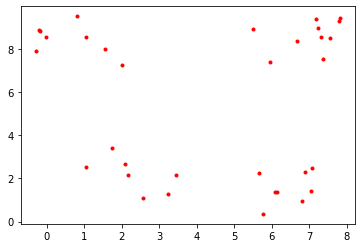

In [203]:
plt.scatter(U, V, marker='.', c='r')

# Clustering

In [204]:
model = KMeans(n_clusters=4)
model.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [205]:
model.predict(dataset)

array([0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3])

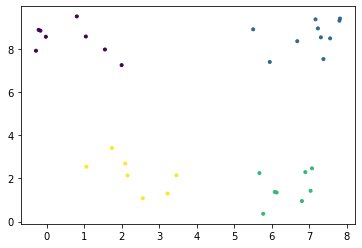

In [206]:
plt.scatter(U, V, marker='.', c=model.predict(dataset))

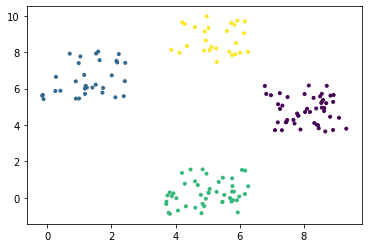

In [207]:
dataset2 = dataset_clusters(4, taille_max_cluster=50)
model.fit(dataset2)
X, Y = separe(dataset2)
plt.scatter(X, Y, marker='.', c=model.predict(dataset2))

In [208]:
centroides = model.cluster_centers_#détermine les lieux des centroides
print(centroides)

[[8.08708338 4.81271323]
 [1.27827622 6.50414484]
 [4.98521708 0.24089102]
 [5.25098395 8.70624612]]


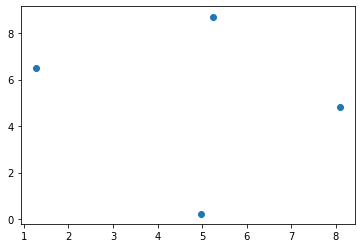

In [209]:
plt.scatter(centroides[:, 0], centroides[:, 1])

In [210]:
model.inertia_#fonction cout : inertia (somme des distances entre les points et leur centroide)

168.06638198995654

### Combien de clusters ?

In [211]:
inertia = []
for i in range(1, 10):
    model = KMeans(n_clusters=i).fit(dataset2)
    inertia.append(model.inertia_)

print(inertia)

[2533.8206294383704, 1202.4350018293553, 470.1977631625337, 168.06638198995654, 144.75185141945383, 121.84901979050588, 102.04964904112957, 89.35622369532308, 78.63144992262092]


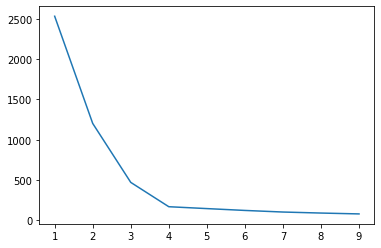

In [212]:
plt.plot(list(range(1, 10)), inertia)

### Dimensions superieures

In [240]:
dataset3 = dataset_clusters(4, dim=3, taille_max_cluster=50)

In [241]:
model3 = KMeans(n_clusters=4)
model3.fit(dataset3)
X, Y, Z = separe(dataset3)

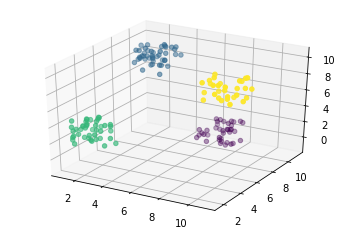

In [242]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=model3.predict(dataset3))

# Detection d'anomalies

In [249]:
dataset4 = dataset_clusters(n=1, taille_max_cluster=50)

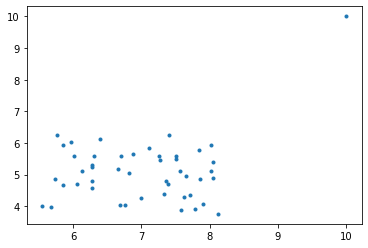

In [250]:
dataset4.append((10, 10))
U, V = separe(dataset4)
plt.scatter(U, V, marker='.')

In [251]:
model4 = IsolationForest(contamination=0.01)
model4.fit(dataset4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


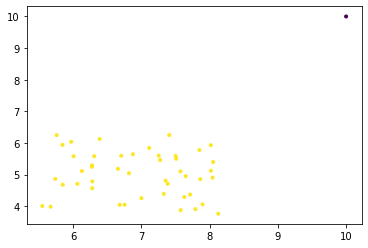

In [253]:
plt.scatter(U, V, marker='.', c=model4.predict(dataset4))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


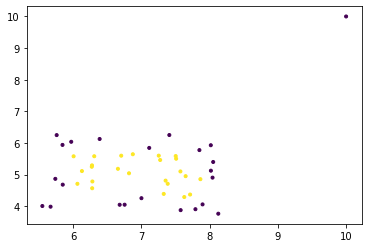

In [255]:
model5 = IsolationForest(contamination=0.5)
model5.fit(dataset4)
plt.scatter(U, V, marker='.', c=model5.predict(dataset4))

### Application

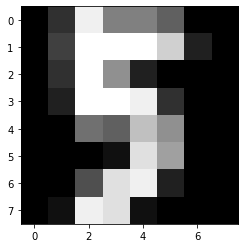

In [279]:
digits = load_digits()
images = digits.images
X = digits.data
Y = digits.target
plt.imshow(images[35], cmap='gray')

In [280]:
print(images[35])

[[ 0.  3. 15.  8.  8.  6.  0.  0.]
 [ 0.  4. 16. 16. 16. 13.  2.  0.]
 [ 0.  3. 16.  9.  2.  0.  0.  0.]
 [ 0.  2. 16. 16. 15.  3.  0.  0.]
 [ 0.  0.  7.  6. 12.  9.  0.  0.]
 [ 0.  0.  0.  1. 14. 10.  0.  0.]
 [ 0.  0.  5. 14. 15.  2.  0.  0.]
 [ 0.  1. 15. 14.  1.  0.  0.  0.]]


In [281]:
model6 = IsolationForest(random_state=0, contamination=0.03)

In [282]:
model6.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.03,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


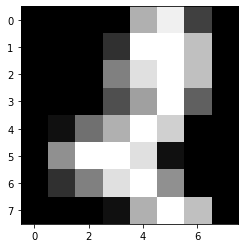

In [283]:
rejetes = model6.predict(X) == -1
plt.imshow(images[rejetes][0], cmap='gray')

# Reduction de dimension

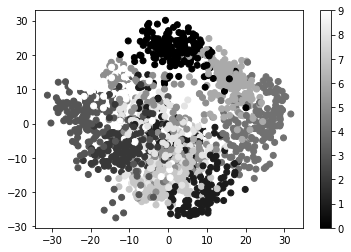

In [294]:
model7 = PCA(n_components=2)
X_compresse = model7.fit_transform(X)
plt.scatter(X_compresse[:, 0], X_compresse[:, 1], c=Y, cmap='gray')
plt.colorbar()

In [295]:
model8 = PCA(n_components=64)
X_compresse2 = model8.fit_transform(X)

In [296]:
model8.explained_variance_ratio_#degradation de chaque projection de 64 dim à 1 dim

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [297]:
np.cumsum(model8.explained_variance_ratio_)#somme cumulée des degradations

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

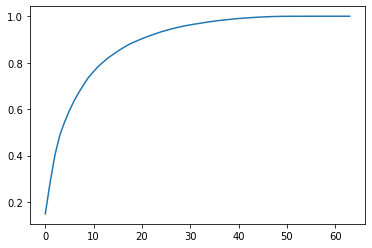

In [298]:
plt.plot(np.cumsum(model8.explained_variance_ratio_))

In [299]:
model9 = PCA(n_components=40)
X_compresse_final = model9.fit_transform(X)

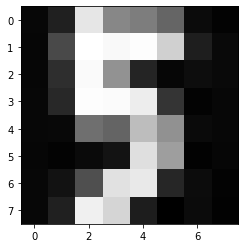

In [300]:
X_reconstitue = model9.inverse_transform(X_compresse_final)
plt.imshow(X_reconstitue[35].reshape((8, 8)), cmap='gray')

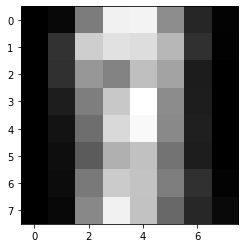

In [302]:
X_reconstitue2 = model7.inverse_transform(X_compresse)
plt.imshow(X_reconstitue2[35].reshape((8, 8)), cmap='gray')

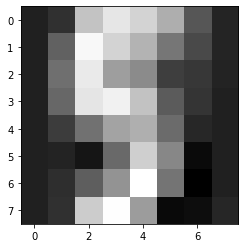

In [307]:
model10 = PCA(n_components=0.67)
image = model10.inverse_transform(model10.fit_transform(X))[35]
plt.imshow(image.reshape((8, 8)), cmap='gray')

In [308]:
model10.n_components_

8